In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import seaborn as sns
from scipy.optimize import curve_fit
from pandas.tools.plotting import table
from mpl_toolkits.mplot3d import Axes3D


%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 9] # bigger figures
plt.rcParams['font.size'] = 20
pd.set_option('display.max_rows',100)

In [123]:
# Separtors: whitspace, not just tab
# Don't use first column as index
# more info: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html
dat = pd.read_table(open('v2.txt'), delim_whitespace=True, index_col=False)

In [126]:
dat

,t,i,st,si,I,sI
0,0,53.2,1,0.5,0.000088,8.315577e-07
1,2,50.8,1,0.5,0.000084,8.315577e-07
2,4,50.0,1,0.5,0.000083,8.315577e-07
3,6,49.6,1,0.5,0.000082,8.315577e-07
4,8,49.2,1,0.5,0.000082,8.315577e-07
5,10,48.8,1,0.5,0.000081,8.315577e-07
6,12,46.0,1,0.5,0.000076,8.315577e-07
7,14,45.5,1,0.5,0.000076,8.315577e-07
8,16,43.5,1,0.5,0.000072,8.315577e-07
9,18,43.9,1,0.5,0.000073,8.315577e-07


In [127]:
dat.st = 1
dat.si = 0.5
dat.I = 4*dat.i/(875**2 * np.pi)
dat.sI = 4/(np.pi * 875**2) * np.sqrt(0.5**2 + 4/(875**2) * 2.5**2)

In [128]:
dat.describe()

,t,i,st,si,I,sI
count,41.000000,41.000000,41.0,41.0,41.000000,4.100000e+01
mean,9.390244,32.270732,1.0,0.5,0.000054,8.315577e-07
std,36.823822,16.065292,0.0,0.0,0.000027,0.000000e+00
min,-65.000000,1.600000,1.0,0.5,0.000003,8.315577e-07
25%,-15.000000,18.500000,1.0,0.5,0.000031,8.315577e-07
50%,14.000000,38.700000,1.0,0.5,0.000064,8.315577e-07
75%,34.000000,43.900000,1.0,0.5,0.000073,8.315577e-07
max,75.000000,53.200000,1.0,0.5,0.000088,8.315577e-07


In [129]:
def f(t, I, n):
    return I * np.cos(np.radians(t))**n

In [130]:
def F(t, I):
    return f(t, I, 1)

In [131]:
fit_res = curve_fit(F, dat.t, dat.I, p0 = 2.125323e-05)
print(fit_res)
fg = fit_res[0] 
sg=(np.diag(fit_res[1]))
print(fg)


(array([  7.05500984e-05]), array([[  6.59992641e-12]]))
[  7.05500984e-05]


In [148]:
fit_res = curve_fit(f, dat.t, dat.I)
print(fit_res)
fg = fit_res[0] 
sg=(np.diag(fit_res[1]))
print(fg)


(array([  8.35213561e-05,   2.42727512e+00]), array([[  2.37589068e-12,   1.25264768e-07],
       [  1.25264768e-07,   1.89813329e-02]]))
[  8.35213561e-05   2.42727512e+00]


In [146]:
np.sqrt(2.37589068e-12)

1.5413924484050127e-06

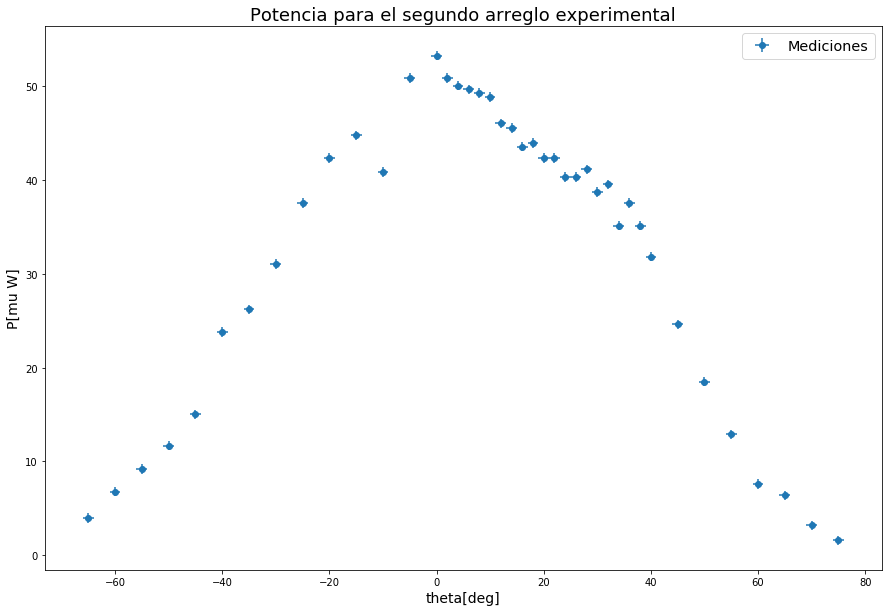

In [138]:
plt.figure(figsize = (15, 10))
plt.errorbar(dat.t, dat.i , xerr= dat.st, yerr = dat.si, fmt= "o", label="Mediciones")
plt.xlabel('theta[deg]', size ='14')
plt.ylabel('P[mu W]', size ='14')
plt.title('Potencia para el segundo arreglo experimental', size='18')
plt.legend(loc = 0, fontsize='x-large')
plt.savefig('w2.pdf')

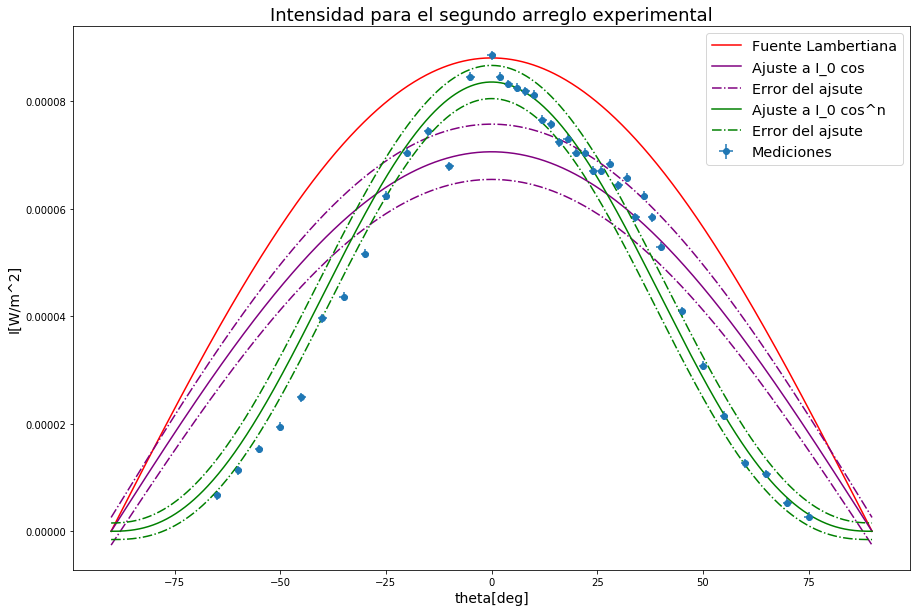

In [145]:
xf = np.linspace(-90 , 90, 1000)
plt.figure(figsize = (15, 10))
plt.errorbar(dat.t, dat.I , xerr= dat.st, yerr = dat.sI, fmt= "o", label="Mediciones")
plt.plot(xf,   0.000088* np.cos(np.radians(xf))**1, '-', label='Fuente Lambertiana', color='red')
plt.plot(xf,  7.05500984e-05 * np.cos(np.radians(xf))**1, '-', label='Ajuste a I_0 cos', color='purple')
plt.plot(xf,  (7.05500984e-05 + 2.5690321932587767e-06) * np.cos(np.radians(xf))**(1) + 2.5690321932587767e-06, '-.', label='Error del ajsute', color='purple')
plt.plot(xf,  (7.05500984e-05 - 2.5690321932587767e-06) * np.cos(np.radians(xf))**(1) - 2.5690321932587767e-06, '-.', label='Error del ajsute', color='purple')
plt.plot(xf,  8.35213561e-05 * np.cos(np.radians(xf))**2.42727512, '-', label='Ajuste a I_0 cos^n', color='green')
plt.plot(xf,  (8.35213561e-05 + 1.5413924484050127e-06) * np.cos(np.radians(xf))**(2.42727512-0.13777275819261223) + 1.5413924484050127e-06, '-.', label='Error del ajsute', color='green')
plt.plot(xf,  (8.35213561e-05 - 1.5413924484050127e-06) * np.cos(np.radians(xf))**(2.42727512+0.13777275819261223) - 1.5413924484050127e-06, '-.', label='Error del ajsute', color='green')
plt.xlabel('theta[deg]', size ='14')
plt.ylabel('I[W/m^2]', size ='14')
plt.title('Intensidad para el segundo arreglo experimental', size='18')
plt.legend(loc = 0, fontsize='x-large')
plt.savefig('I2.pdf')

In [ ]:
0.000013fig, ax = plt.subplots(figsize=(12, 2)) # set size frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)  # no visible frame, uncomment if size is ok
tabla = table(ax, dat, loc='upper center', colWidths=[0.17]*len(dat.columns))  # where df is your data frame
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(2, 2) # change size table
plt.suptitle("Valores estadisticos para g en el conjunto de datos", fontsize=14)
plt.savefig('gw.png', transparent=True)
